<a href="https://colab.research.google.com/github/supanekarrutvik/DS_PY_Writeups_2102639/blob/main/Exp04_notebook_2102639.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment No : 04

##**Aim :** 
Learn use of maplotlib library as visualisation tool in data science pipeline to create contour plots, histograms and box plots.

## Performance : 

[Students need to execute each and every cell in this section and note the output of the same. Once done they have to answer Questions mentioned in review section]


### Density and Contour plots
Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.

There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.

We will see examples of this type of plot in section below

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

<ipython-input-2-9721c6b74aa7>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
# A 3D function to plot 

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the ``plt.contour`` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.

The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.

Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays:

In [ ]:
# x is set of 50 values between 0 and 5 
# x is set of 40 values between 0 and 5

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot:

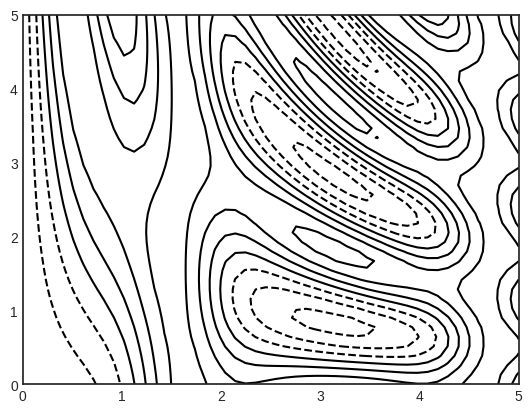

In [ ]:
plt.contour(X, Y, Z, colors='black');

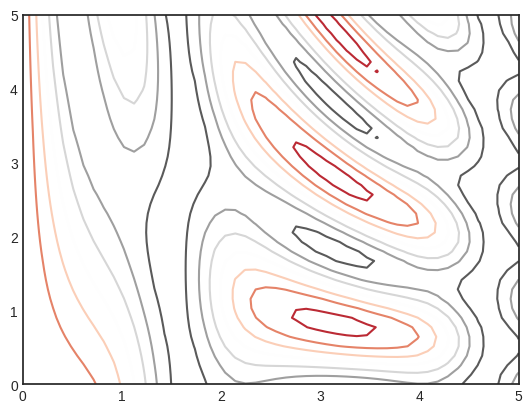

In [ ]:
plt.contour(X, Y, Z, cmap='RdGy');

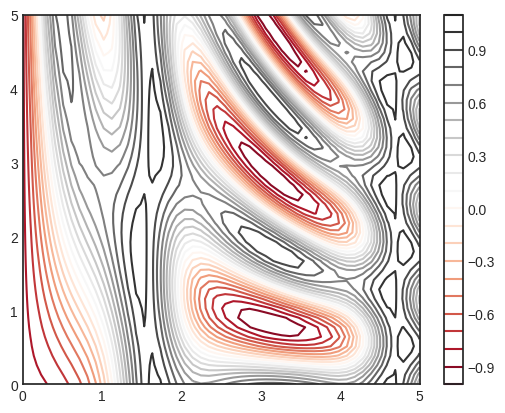

In [ ]:
plt.contour(X, Y, Z, 20, cmap='RdGy');
plt.colorbar();

#Answer Following Questions : 
##Q1.   Explain what are the changes you observe in contour plots above 3 code cells ?
##My Answer 
Exmaple no 1

plt.contour(X, Y, Z, colors='black') is a function call in Python's Matplotlib library that creates a contour plot of the data in the Z array, with the X
and Y arrays specifying the coordinates of the points where the Z values are measured. In a contour plot, the Z values are represented by
isolines, or contours, which are lines that connect points of equal Z value. The colors parameter sets the color of the isolines; in this case,
colors='black' specifies that the isolines should be drawn in black.

Example no 2

Similar to the previous example, a contour plot is created where Z values are represented by isolines or contours. However, the cmap parameter
has been set to 'RdGy', which specifies the color map to use for the isolines.

Example no 3

The code plt.contour(X, Y, Z, 20, cmap='RdGy') creates a contour plot of the data in the Z array with the X and Y arrays specifying the
coordinates of the points where the Z values are measured. The 20 argument specifies the number of contours to draw, dividing the range of Z
values into 20 equally spaced levels. The cmap='RdGy' argument specifies the 'RdGy' colormap to use for the isolines as previously mentioned.
The code plt.colorbar() adds a colorbar to the contour plot created by the previous command. A colorbar is a graphical representation of the
relationship between the colors in the plot and the numerical values they represent. The colorbar typically includes a scale indicating the range
of values represented by each color. In this case, the colorbar will show the range of values in the Z array, with the colors corresponding to the
isolines in the contour plot.


##Q2.   What is size of X, Y and Z  respectively ?
##My Answer 

In [ ]:
size1=x.size
print(size1)
print("_____________________________________________________")
size2=y.size
print(size2)
print("_____________________________________________________")
print(Z)
size3=Z.size
print(size3)


50
_____________________________________________________
40
_____________________________________________________
[[-0.83907153 -0.83470697 -0.8216586  ...  0.8956708   0.68617261
   0.41940746]
 [-0.83907153 -0.8275558  -0.80744041 ...  0.93467448  0.77467433
   0.55894214]
 [-0.83907153 -0.820263   -0.79266951 ...  0.98503397  0.88847607
   0.73757604]
 ...
 [-0.83907153 -0.48696962 -0.02692065 ...  0.98525345  0.79584263
   0.46799565]
 [-0.83907153 -0.47558005 -0.00130271 ...  0.93488414  0.6993547
   0.37933079]
 [-0.83907153 -0.46410908  0.02431613 ...  0.89579384  0.65690314
   0.40107702]]
2000


##Q3.   How does colorbar() method help in contour plot.
##My Answer 
The colorbar() method is a function in Python's Matplotlib library that is used to add a colorbar to a contour plot. A contour plot is a graphical representation of a 3-dimensional surface in 2 dimensions, where the contours represent different levels of the function being plotted. The colorbar() function adds a color scale to the side of the contour plot that helps to visually represent the function values at each contour level.

The colorbar function generates a separate axis on the side of the main plot, which displays a gradient of colors that correspond to the different contour levels in the main plot. This colorbar makes it easy to understand which colors correspond to which function values, and allows for a quick and intuitive interpretation of the data being plotted.

In summary, the colorbar() method helps in contour plots by providing a visual representation of the color-coded values used to represent the contours, making it easier to interpret the data being displayed.

### Creating Smoother Contour Plots
One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired.

This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to handle this is to use the ``plt.imshow()`` function, which interprets a two-dimensional grid of data as an image.



Things to remember while using ``imshow()``:

- ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ``plt.axis(aspect='image')`` to make *x* and *y* units match.

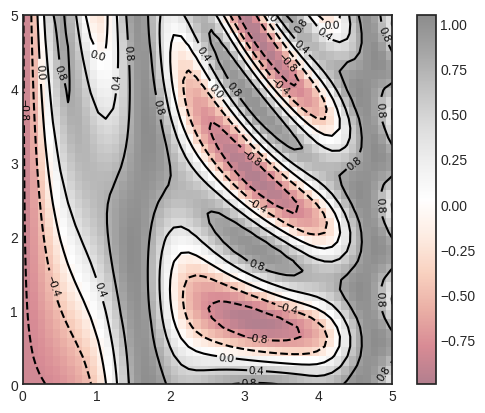

In [ ]:
contours = plt.contour(X, Y, Z, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

Answer Following Questions : 
1.   What does alpha parameter do ?

##MY Answer 

The alpha parameter is a parameter in Matplotlib that controls the opacity or transparency of a plot element. It is a value between 0 and 1,
where 0 is completely transparent and 1 is completely opaque.

The alpha parameter can be used with most plot types in Matplotlib, including scatter plots, line plots, bar plots, and contour plots, among
others. When applied to a plot element, the alpha parameter changes the transparency of that element. For example, if you create a scatter plot
of points and set the alpha parameter to 0.5, the points in the plot will be partially transparent, allowing you to see overlapping points.



2.   What does clabel method does ?

##MY Answer 




The clabel method in Matplotlib is used to add labels to the contour lines of a contour plot.
After creating a contour plot using the contour method, you can call the clabel method to add text labels to the contour lines. The clabel method
takes the contour plot object as its first argument, and can also take several optional arguments to customize the appearance of the labels,
such as fontsize, colors, and fmt

3.   Recreate above code block after, changing parameter 4 in contour fuction to 5 from 3. Explain what change you see in the plot.  

#My Answer 


By changing the number of contours from 3 to 5 in the contour function call, we increase the number of contour lines that are drawn on the plot.
This will result in more detailed contours that better represent the shape of the underlying distribution.
Specifically, the contour lines will now divide the range of Z values into five levels instead of three, resulting in a more finely grained visualization
of the distribution.
So the overall change we see after modifying the code is an increase in the level of detail in the contour plot

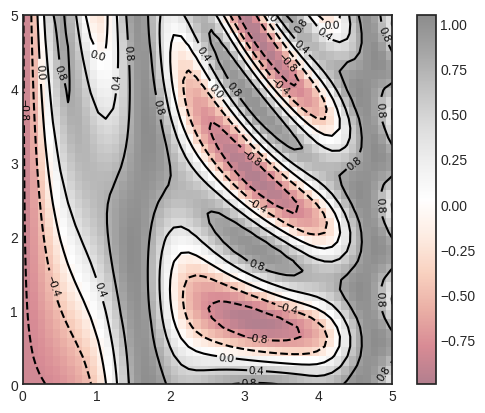

In [ ]:
contours = plt.contour(X, Y, Z, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
cmap='RdGy', alpha=0.5)
plt.colorbar();

### Histogram, Binning Plots

A histogram is a graphical representation of a grouped frequency distribution with continuous classes. It is an area diagram and can be defined as a set of rectangles with bases along with the intervals between class boundaries and with areas proportional to frequencies in the corresponding classes. In such representations, all the rectangles are adjacent since the base covers the intervals between class boundaries. The heights of rectangles are proportional to corresponding frequencies of similar classes and for different classes, the heights will be proportional to corresponding frequency densities.

In other words, a histogram is a diagram involving rectangles whose area is proportional to the frequency of a variable and width is equal to the class interval.

The histogram graph is used under certain conditions. They are:



*   The data should be numerical.
*   A histogram is used to check the shape of the data distribution. 
*   Used to check whether the process changes from one period to another.
*   Used to determine whether the output is different when it involves two or more processes.
*   Used to analyse whether the given process meets the customer requirements.



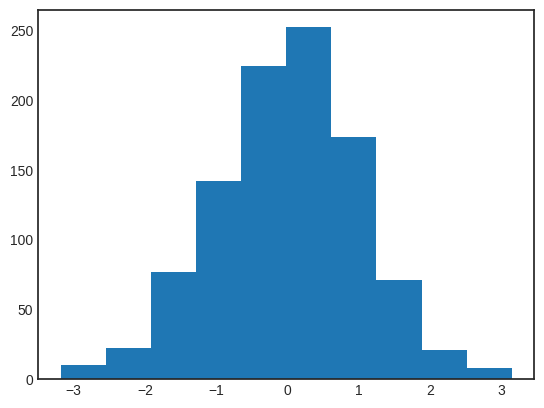

In [ ]:
# How to plot histogram
data = np.random.randn(1000)
plt.hist(data);

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

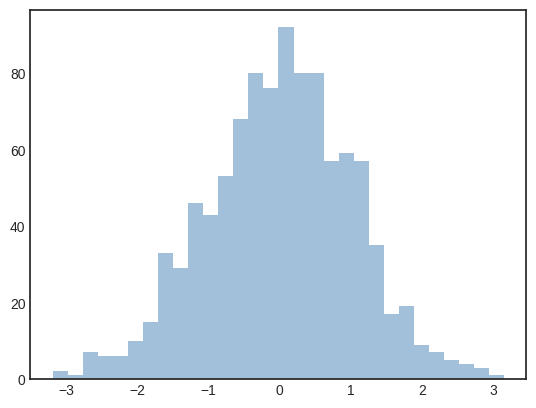

In [ ]:
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

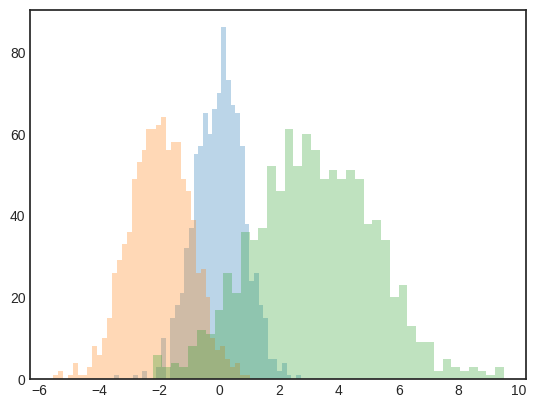

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [ ]:
#Only storing histogram bin frequencies without ploting it
counts, bin_edges = np.histogram(data, bins=5)
print(counts,bin_edges)

[ 32 219 476 244  29] [-3.18243881 -1.9158037  -0.64916859  0.61746652  1.88410163  3.15073674]


### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

In [ ]:
# Create 2 Variable normally distributed data sets with 10000 
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

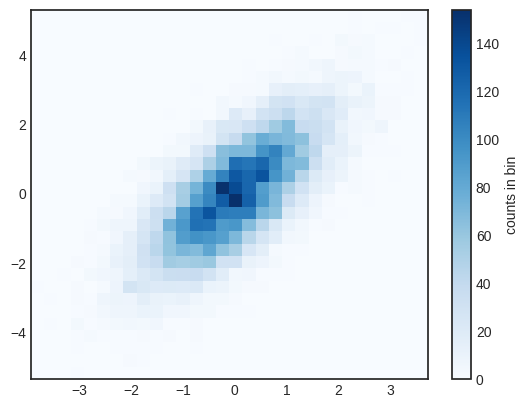

In [ ]:
#Using 2d Histogram plot
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with ``plt.hist``, ``plt.hist2d`` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as ``plt.hist`` has a counterpart in ``np.histogram``, ``plt.hist2d`` has a counterpart in ``np.histogram2d``, which can be used as follows:

In [ ]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

### ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

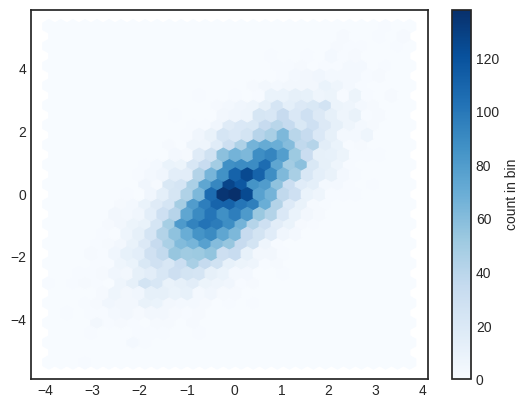

In [ ]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

#Questions:

##Q1.  What is role of bins parameter in histogram plot?
##MY Answer 
In a histogram plot, the bins parameter determines the number of intervals, or bins, that the data is divided into. Each bin represents a range of values, and the height of the bar within each bin represents the number of data points that fall within that range.

The bins parameter is a key aspect of histogram plotting because it determines the level of detail in the resulting plot. If the number of bins is too low, the resulting histogram will be too smooth, and important details in the distribution may be lost. Conversely, if the number of bins is too high, the resulting histogram may appear too spiky or noisy, and it may be difficult to discern patterns or trends.

Determining the appropriate number of bins is a matter of balancing these concerns, and it typically requires some experimentation to find the optimal value. A good starting point is often to use the square root of the total number of data points, but this can vary depending on the specific data set and the research question being investigated.

In summary, the bins parameter in a histogram plot is used to control the level of detail in the resulting plot by specifying the number of intervals, or bins, that the data is divided into.
 

 
##Q2.  Create a set of 10000 uniform random samples and store it in variable named *norm_data*. Draw histograms of *norm_data* with following bin counts 5, 50, 500, 5000.
##My Answer 
Here's an example code in Python to create a set of 10000 uniform random samples and plot histograms of norm_data with bin counts of 5, 50, 500, and 5000:

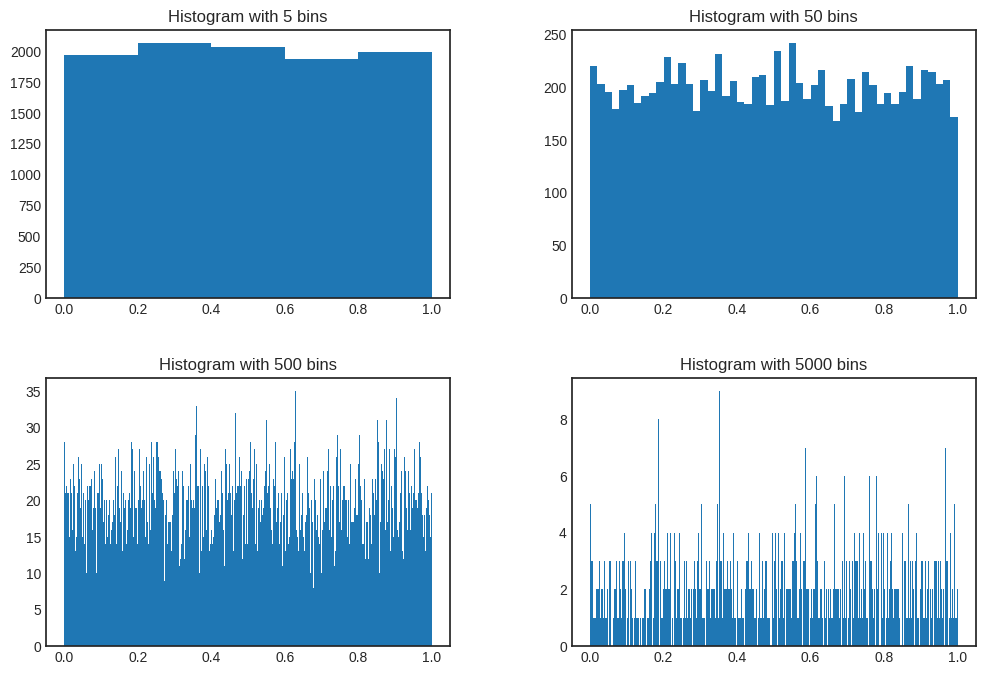

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a set of 10000 uniform random samples
norm_data = np.random.uniform(size=10000)

# Define bin counts
bins_5 = 5
bins_50 = 50
bins_500 = 500
bins_5000 = 5000

# Create subplots with histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].hist(norm_data, bins=bins_5)
axs[0, 0].set_title('Histogram with ' + str(bins_5) + ' bins')
axs[0, 1].hist(norm_data, bins=bins_50)
axs[0, 1].set_title('Histogram with ' + str(bins_50) + ' bins')
axs[1, 0].hist(norm_data, bins=bins_500)
axs[1, 0].set_title('Histogram with ' + str(bins_500) + ' bins')
axs[1, 1].hist(norm_data, bins=bins_5000)
axs[1, 1].set_title('Histogram with ' + str(bins_5000) + ' bins')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()


This code creates a set of 10000 uniform random samples using the np.random.uniform method and stores it in the norm_data variable. Then, it defines the bin counts for each histogram as bins_5, bins_50, bins_500, and bins_5000.

The plt.subplots method creates a figure with four subplots arranged in a 2x2 grid. Each subplot is a histogram of norm_data with the corresponding bin count, which is specified using the bins parameter of the plt.hist method. The set_title method is used to add a title to each histogram. Finally, the plt.subplots_adjust method is used to adjust the spacing between the subplots, and the plt.show method is used to display the plot.

##Q3.  Explain your observations in text box of above step.

### Ploting from a CSV File

### Multiple Subplots
Sometimes it is helpful to compare different views of data side by side. Matplotlib has the concept of *subplots* : groups of smaller axes that can exist together within a single figure.

These subplots might be insets, grids of plots, or other more complicated layouts. 

In [ ]:
plt.style.use('seaborn-white')
import numpy as np

<ipython-input-20-fc4ce995d0e1>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


### ``plt.axes``: Subplots by Hand (Coding)

The most basic method of creating an axes is to use the ``plt.axes`` function. By default this creates a standard axes object that fills the entire figure.

``plt.axes`` also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent 
``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

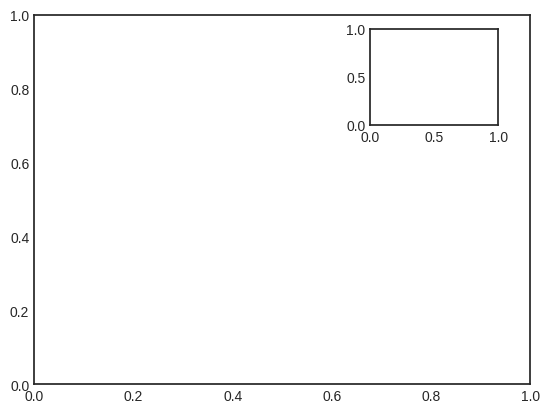

In [ ]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.650, 0.650, 0.2, 0.2]) #inset axes

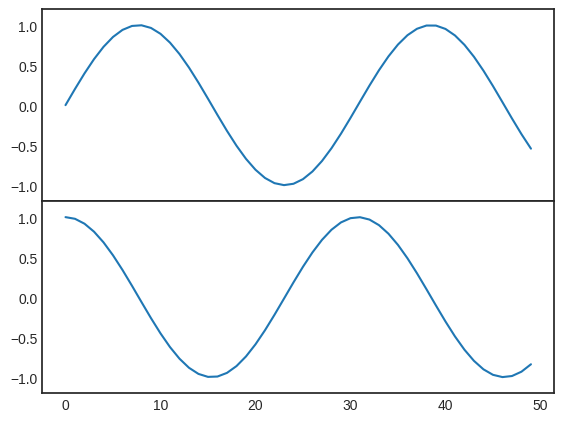

In [ ]:
#creating subplot using fig.add_axes
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

### ``plt.subplot``: Simple Grids of Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.

The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.

As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

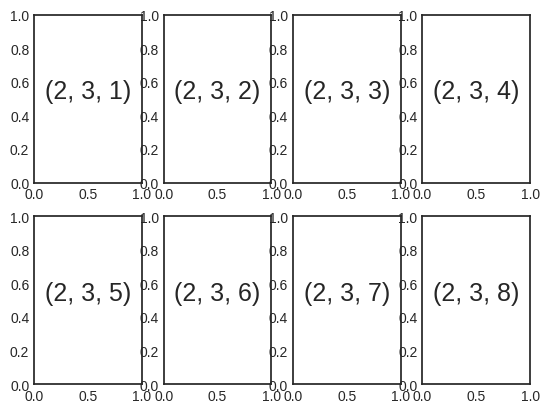

In [ ]:
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')


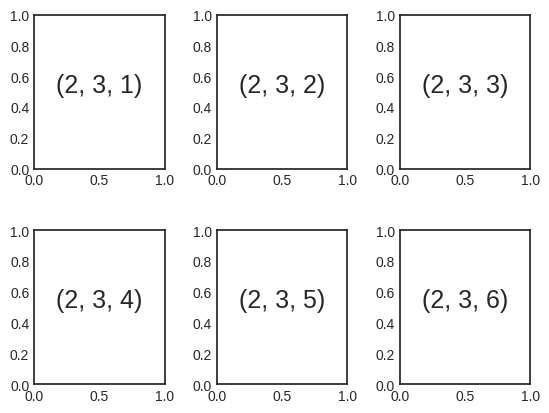

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

### ``plt.subplots``: The Whole Grid in One Go

The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

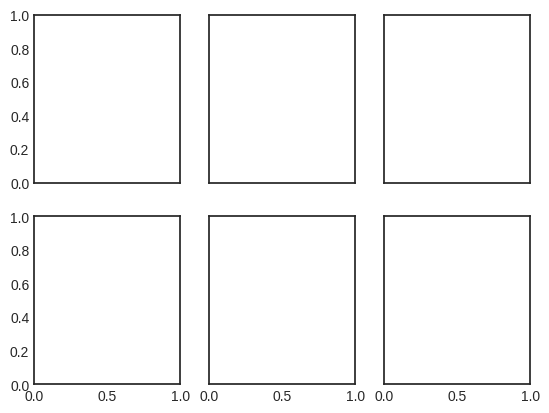

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Note that by specifying ``sharex`` and ``sharey``, we've automatically removed inner labels on the grid to make the plot cleaner.


The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

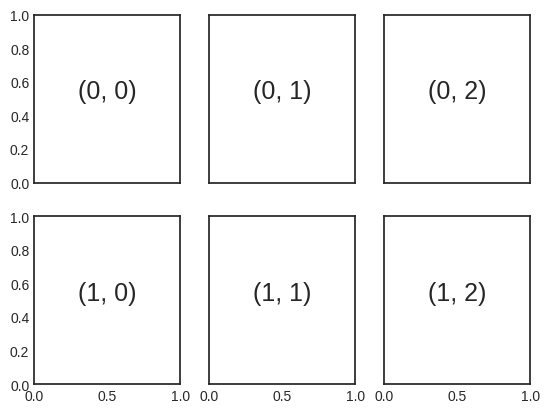

In [ ]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

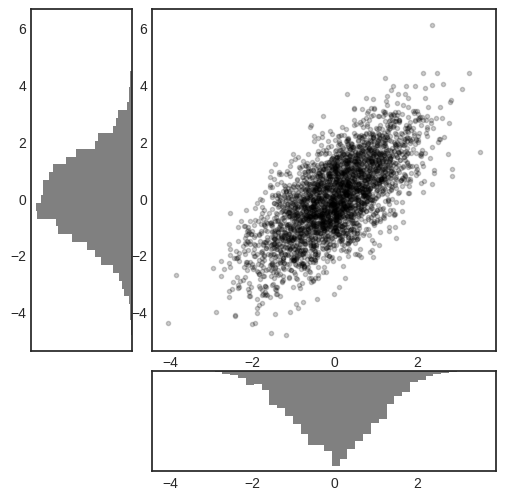

In [ ]:
# An example of Flexible grid arrangement
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()


### Boxplot

A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. 

In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.



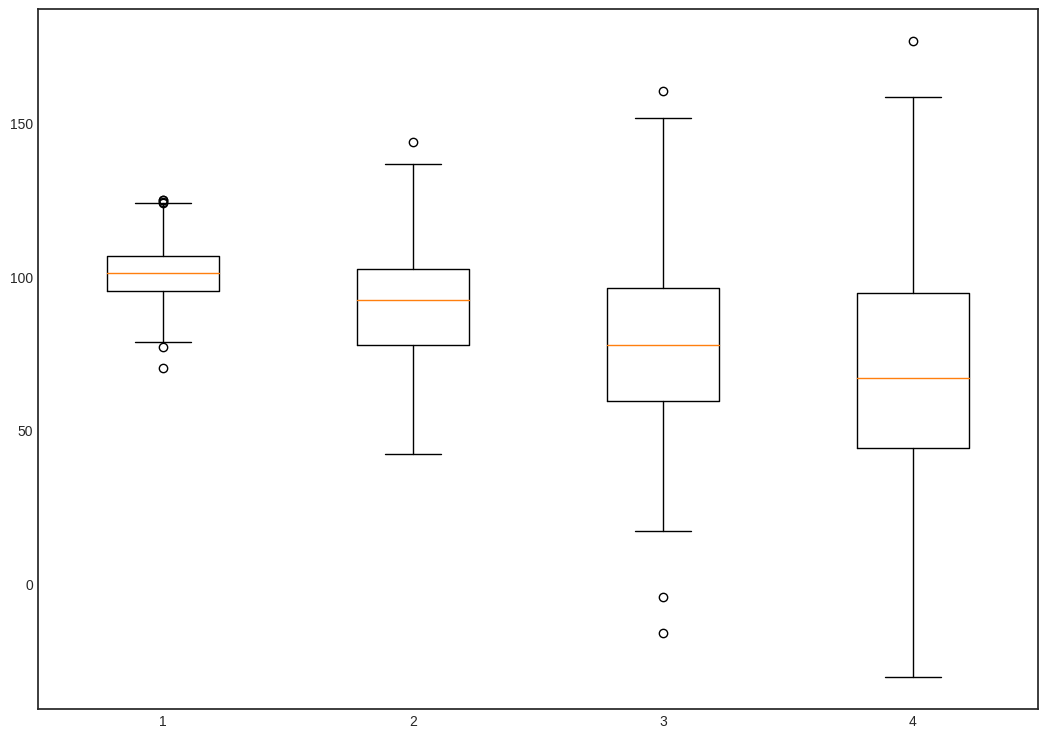

In [ ]:
#Exmple of Box plot for some random data sets
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
 
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()


#Questions:

##Q1. What is boxplot ?
##MY Answer 
A boxplot is a graphical representation of the distribution of a dataset, showing the median, quartiles, and outliers. It is also known as a box-and-whisker plot.

The box in the plot represents the interquartile range (IQR), which is the middle 50% of the data. The bottom of the box represents the first quartile (Q1), which is the 25th percentile of the data, and the top of the box represents the third quartile (Q3), which is the 75th percentile of the data. The line inside the box represents the median, which is the 50th percentile of the data.

The whiskers of the boxplot extend from the top and bottom of the box to the furthest observations within a distance of 1.5 times the IQR from the box. Any observations outside this range are considered outliers and are plotted as individual points.

Boxplots are useful for quickly visualizing the distribution of a dataset and identifying any outliers or skewness. They are commonly used in exploratory data analysis and statistical inference.



##Q2. What information do we get from a box plot?
##My Answer 

A box plot provides several pieces of information about the distribution of a dataset:

Median: The line inside the box represents the median of the data, which is the value separating the lower 50% of the data from the upper 50% of the data.

Quartiles: The box represents the interquartile range (IQR), which is the middle 50% of the data. The bottom of the box represents the first quartile (Q1), which is the value separating the lowest 25% of the data from the upper 75% of the data, and the top of the box represents the third quartile (Q3), which is the value separating the lowest 75% of the data from the upper 25% of the data.

Range: The whiskers extend from the box to the minimum and maximum values within 1.5 times the IQR from the box. Observations beyond the whiskers are considered outliers and are plotted as individual points.

Skewness and symmetry: The shape of the box plot can provide information about the skewness and symmetry of the data. A symmetric distribution will have a box that is approximately centered between the whiskers, while a skewed distribution will have a box that is shifted towards one end of the plot.

Spread and variability: The length of the whiskers provides an indication of the spread and variability of the data. A longer whisker indicates that the data is more spread out and variable, while a shorter whisker indicates that the data is more tightly clustered around the median.

Overall, box plots are a useful tool for summarizing the distribution of a dataset and identifying any outliers or unusual features. They are commonly used in exploratory data analysis and statistical inference.


##Q3. How is minimum and maximum whisker's marked in a box plot ?
##My Answer 

In a box plot, the minimum and maximum whiskers are marked as horizontal lines extending from the bottom and top of the box, respectively, to the smallest and largest observations within 1.5 times the interquartile range (IQR) from the bottom and top of the box.

To determine the minimum and maximum whiskers, we first calculate the IQR, which is the difference between the third quartile (Q3) and the first quartile (Q1) of the data. We then multiply the IQR by 1.5, and add this value to Q3 and subtract it from Q1 to get the upper and lower limits of the whiskers, respectively. Any observations outside these limits are considered outliers and are plotted as individual points.

If there are no observations beyond the whiskers, the whiskers extend to the minimum and maximum values in the dataset. However, if there are outliers beyond the whiskers, they are plotted as individual points, and the whiskers only extend up to the last observation within the whisker limits.


##Q4. How to we identify that some points in data are outliers by viewing the box plot? 
##My Answer 

In a box plot, outliers can be identified as individual points that are plotted beyond the whiskers, which extend from the top and bottom of the box to the smallest and largest observations within 1.5 times the interquartile range (IQR) from the bottom and top of the box.

To identify outliers in a box plot, we can visually inspect the plot for any points that are plotted beyond the whiskers. Any points outside the whiskers are considered outliers, and they may indicate unusual or extreme values in the data. Outliers can be caused by measurement errors, data entry errors, or genuine extreme values in the data.

It is important to note that not all data points outside the whiskers are necessarily outliers. Sometimes, data points may fall outside the whiskers due to natural variability in the data. Therefore, it is important to carefully evaluate any potential outliers and determine whether they are genuine extreme values or errors in the data.

In summary, outliers in a box plot can be identified as individual points plotted beyond the whiskers. Visual inspection of the plot is typically used to identify outliers, but it is important to carefully evaluate any potential outliers to determine their validity.

5. Read a data file from your drive and for all numeric columns plot boxplot.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the data file into a pandas DataFrame
data = pd.read_csv('path/to/data/file.csv')

# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for each numeric column
for col in numeric_columns:
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this code, we first read the data file into a pandas dataframe using the read_csv function. We then select the numeric columns using the select_dtypes function, which returns a list of column names. We then iterate over the numeric columns and plot a boxplot for each column using the boxplot function from matplotlib. Finally, we add a title and axis labels to the plot and display it using the show function from matplotlib.

Note that the code assumes that the data file is in CSV format and that the numeric columns are of type float64 or int64. You may need to modify the code if your data is in a different format or if your numeric columns have a different data type.


## Conclusion
Thus we have learned about basics of  Contour plots, Histograms, Box plots. 